## Question 1

>On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.


### (a) 
>Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

In [12]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [4]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [6]:
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

From this summary, we can infer that extreme outliers are present as the maximum order amount is 704000.00 while the third quartile is 390.00! It also seems that the mean metric is being used for the AOV.

We can better understand this by visualizing the data

<AxesSubplot:>

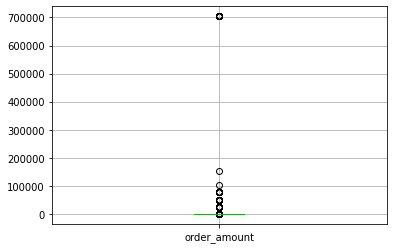

In [14]:
data.boxplot(column='order_amount')

There are so much outliers that our box plot becomes a line. 

One of the problems here is using mean as the AOV. The mean is a not a robust statistic and that means it is sensible to outliers as we can see in this case.

In [26]:
extreme_amounts_count = data.groupby(['order_amount']).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
extreme_amounts_count.head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


In [27]:
data.loc[data['order_amount'].isin([704000, 77175, 51450, 25725])].sort_values(by='order_amount', ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
...,...,...,...,...,...,...,...
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57


In [28]:
data[data.user_id == 607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


This is an anomaly! This customer made 17 purchases, each costing 704000 using the same payment method, a credit card. This should be probed further as it is highly unusual and suspicious.

<AxesSubplot:>

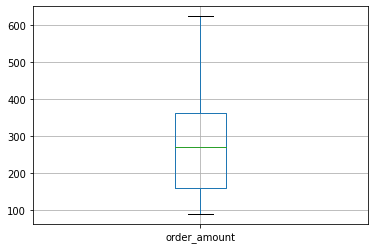

In [33]:
q1 = data.order_amount.quantile(q=0.25)
q2 = data.order_amount.quantile(q=0.5)
q3 = data.order_amount.quantile(q=0.75)
IQR = q3 - q1

data_cleaned = data[(data.order_amount < q2 + IQR * 1.5) & (data.order_amount > q2 - IQR * 1.5)]
data_cleaned.boxplot(column='order_amount')

Here, we plotted the values that in the range of 1.5IQ range to the median. The issue with this truncation is that the our extreme values may be valid and we could miss important insights cutting them off.

**(b) What metric would you report for this dataset?**

The median. It is a robust statistic and suitable when dealing with outliers.

In [36]:
data.describe()['order_amount']['50%']

284.0

**(c) What is its value?**

The median value is 284.0

## Question 2

> For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

**(a) How many orders were shipped by Speedy Express in total?**

```
SELECT count(*)
FROM Orders
JOIN Shippers
ON Shippers.ShipperID = Orders.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express';
```

Number of orders shipped by Speedy Express is **54**

**(b) What is the last name of the employee with the most orders?**

```
SELECT Employees.LastName, COUNT(*)
FROM Orders
JOIN Employees
ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY Employees.LastName
ORDER BY count(*) DESC
LIMIT 1
```

The employee with the most order is **Peacock** with **40** orders

**(c) What product was ordered the most by customers in Germany?**

```
SELECT Products.ProductName, SUM(OrderDetails.Quantity) AS TotalOrderAmount
FROM Products
JOIN OrderDetails ON OrderDetails.ProductID = Products.ProductID
JOIN Orders ON Orders.OrderID = OrderDetails.OrderID
JOIN Customers ON Customers.CustomerID = Orders.CustomerID
WHERE Customers.Country = "Germany"
GROUP BY Products.ProductName
ORDER BY SUM(OrderDetails.Quantity) DESC
LIMIT 1;
```

The product ordered the most by customers in Germany is **Boston Crab Meat** with total order count of **160**